## Importing packages and libraries



In [139]:
import pandas as pd
import matplotlib.pyplot as plt

## Parsing forecast data

In [40]:
forecast_df = pd.read_csv('data/windpowerforecasts.dat', delimiter = ';')
forecast_df['dato'] = pd.to_datetime(forecast_df['dato'], format='%Y%m%d%H%M',)
forecast_df['dati'] = pd.to_datetime(forecast_df['dati'], format='%Y%m%d%H%M',)
forecast_df['time'] = forecast_df.dati.apply(lambda x: x.time())
forecast_df = forecast_df[forecast_df['time'] == pd.to_datetime('12:00').time()]
forecast_df = forecast_df[forecast_df['hors'] >= 13]
forecast_df = forecast_df[forecast_df['hors'] <= 36].reset_index()
forecast_df = forecast_df.interpolate()
forecast_df

,index,dato,dati,hors,meas,fore,q5,10,q15,q20,...,q55,q60,q65,q70,q75,q80,q85,q90,q95,time
0,50,2017-01-01 01:00:00,2016-12-31 12:00:00,13,144796.0,138563.0,90423.0,108710.0,121071.0,127537.0,...,142993.0,144718.0,146568.0,148821.0,150989.0,152172.0,153606.0,156823.0,157806.0,12:00:00
1,51,2017-01-01 02:00:00,2016-12-31 12:00:00,14,138824.0,139105.0,84651.0,108377.0,118738.0,126285.0,...,143269.0,144843.0,146943.0,148726.0,150211.0,152244.0,154077.0,155062.0,157605.0,12:00:00
2,52,2017-01-01 03:00:00,2016-12-31 12:00:00,15,139307.0,138035.0,96420.0,111929.0,119582.0,124943.0,...,140940.0,141909.0,144100.0,146150.0,148299.0,150362.0,153688.0,155021.0,156767.0,12:00:00
3,53,2017-01-01 04:00:00,2016-12-31 12:00:00,16,139602.0,138786.0,101909.0,111329.0,120306.0,124232.0,...,141384.0,143238.0,145445.0,147903.0,150514.0,152098.0,153253.0,154366.0,156323.0,12:00:00
4,54,2017-01-01 05:00:00,2016-12-31 12:00:00,17,137667.0,136031.0,95823.0,104261.0,115444.0,120678.0,...,138565.0,140940.0,142948.0,145022.0,147950.0,151025.0,152227.0,154101.0,157501.0,12:00:00
5,55,2017-01-01 06:00:00,2016-12-31 12:00:00,18,114107.0,128874.0,88974.0,101313.0,108332.0,112846.0,...,130990.0,133086.0,135476.0,137967.0,141109.0,144825.0,146963.0,150522.0,153656.0,12:00:00
6,56,2017-01-01 07:00:00,2016-12-31 12:00:00,19,37123.0,130481.0,82070.0,103014.0,110972.0,117030.0,...,133419.0,135277.0,137707.0,140344.0,143825.0,146140.0,149186.0,150294.0,153648.0,12:00:00
7,57,2017-01-01 08:00:00,2016-12-31 12:00:00,20,68541.0,73831.0,29850.0,41654.0,49895.0,54721.0,...,73209.0,76014.0,81135.0,86141.0,92001.0,96968.0,102901.0,110220.0,121256.0,12:00:00
8,58,2017-01-01 09:00:00,2016-12-31 12:00:00,21,37023.0,74427.0,33046.0,44180.0,49893.0,53785.0,...,76097.0,79003.0,83137.0,86789.0,91551.0,96157.0,102138.0,109942.0,117335.0,12:00:00
9,59,2017-01-01 10:00:00,2016-12-31 12:00:00,22,16013.0,62913.0,21498.0,30758.0,38352.0,42622.0,...,63701.0,66456.0,70512.0,76307.0,80493.0,86428.0,93504.0,100155.0,111168.0,12:00:00


## Parsing data of Day-ahead prices for 2016 and 2017

In [9]:
prices_dayahead_2016_raw_data = pd.read_html('data/elspot-prices_2016_hourly_dkk.xls')[0].values
prices_dayahead_2016 = pd.DataFrame(prices_dayahead_2016_raw_data)
prices_dayahead_2016 = prices_dayahead_2016.drop([2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19],axis=1)
prices_dayahead_2016.columns = ['Dates', 'Hours', 'DK1']
prices_dayahead_2016['Hours'] = prices_dayahead_2016['Hours'].str.slice(stop=2)
prices_dayahead_2016['ts'] = pd.to_datetime(prices_dayahead_2016['Dates'] + prices_dayahead_2016['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_dayahead_2016 = prices_dayahead_2016.drop(['Dates','Hours'],axis=1)
prices_dayahead_2016['DK1'] = prices_dayahead_2016['DK1']/100
prices_dayahead_2016 = prices_dayahead_2016.set_index('ts')
prices_dayahead_2016.head()

,DK1
ts,
2016-01-01 00:00:00,122.29
2016-01-01 01:00:00,119.68
2016-01-01 02:00:00,117.44
2016-01-01 03:00:00,116.18
2016-01-01 04:00:00,115.43


In [10]:
prices_dayahead_2017_raw_data = pd.read_html('data/elspot-prices_2017_hourly_dkk.xls')[0].values
prices_dayahead_2017 = pd.DataFrame(prices_dayahead_2017_raw_data)
prices_dayahead_2017 = prices_dayahead_2017.drop([2,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18],axis=1)
prices_dayahead_2017.columns = ['Dates', 'Hours', 'DK1']
prices_dayahead_2017['Hours'] = prices_dayahead_2017['Hours'].str.slice(stop=2)
prices_dayahead_2017['ts'] = pd.to_datetime(prices_dayahead_2017['Dates'] + prices_dayahead_2017['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_dayahead_2017 = prices_dayahead_2017.drop(['Dates','Hours'],axis=1)
prices_dayahead_2017['DK1'] = prices_dayahead_2017['DK1']/100
prices_dayahead_2017 = prices_dayahead_2017.set_index('ts')
prices_dayahead_2017.head()

,DK1
ts,
2017-01-01 00:00:00,155.82
2017-01-01 01:00:00,155.37
2017-01-01 02:00:00,134.78
2017-01-01 03:00:00,119.17
2017-01-01 04:00:00,122.14


## Parsing data of Regulating market prices for 2016 and 2017

In [11]:
prices_regulating_2016_raw_data = pd.read_html('data/regulating-prices_2016_hourly_dkk.xls')[0].values
prices_regulating_2016 = pd.DataFrame(prices_regulating_2016_raw_data)
prices_regulating_2016 = prices_regulating_2016.drop([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,24,25],axis=1)
prices_regulating_2016.columns = ['Dates', 'Hours', 'DK1_up', 'DK1_down']
prices_regulating_2016['Hours'] = prices_regulating_2016['Hours'].str.slice(stop=2)
prices_regulating_2016['ts'] = pd.to_datetime(prices_regulating_2016['Dates'] + prices_regulating_2016['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_regulating_2016 = prices_regulating_2016.drop(['Dates','Hours'],axis=1)
prices_regulating_2016['DK1_up'] = prices_regulating_2016['DK1_up']/100
prices_regulating_2016['DK1_down'] = prices_regulating_2016['DK1_down']/100
prices_regulating_2016 = prices_regulating_2016.set_index('ts')
prices_regulating_2016.head()

,DK1_up,DK1_down
ts,,
2016-01-01 00:00:00,126.85,122.29
2016-01-01 01:00:00,126.85,119.68
2016-01-01 02:00:00,117.44,117.44
2016-01-01 03:00:00,116.18,116.18
2016-01-01 04:00:00,115.43,115.43


In [12]:
prices_regulating_2017_raw_data = pd.read_html('data/regulating-prices_2017_hourly_dkk.xls')[0].values
prices_regulating_2017 = pd.DataFrame(prices_regulating_2017_raw_data)
prices_regulating_2017 = prices_regulating_2017.drop([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,24,25],axis=1)
prices_regulating_2017.columns = ['Dates', 'Hours', 'DK1_up', 'DK1_down']
prices_regulating_2017['Hours'] = prices_regulating_2017['Hours'].str.slice(stop=2)
prices_regulating_2017['ts'] = pd.to_datetime(prices_regulating_2017['Dates'] + prices_regulating_2017['Hours'] + ':00', format='%d-%m-%Y%H:%M')
prices_regulating_2017 = prices_regulating_2017.drop(['Dates','Hours'],axis=1)
prices_regulating_2017['DK1_up'] = prices_regulating_2017['DK1_up']/100
prices_regulating_2017['DK1_down'] = prices_regulating_2017['DK1_down']/100
prices_regulating_2017 = prices_regulating_2017.set_index('ts')
prices_regulating_2017.head()

,DK1_up,DK1_down
ts,,
2017-01-01 00:00:00,155.79,114.39
2017-01-01 01:00:00,186.17,155.34
2017-01-01 02:00:00,186.17,134.75
2017-01-01 03:00:00,119.15,119.15
2017-01-01 04:00:00,122.12,122.12


## Joining price data in single dataframe

In [16]:
prices_regulating = pd.concat([prices_regulating_2016, prices_regulating_2017])
prices_dayahed = pd.concat([prices_dayahead_2016, prices_dayahead_2017])
prices = prices_dayahed.join(prices_regulating)
prices = prices[~prices.index.duplicated(keep='first')]

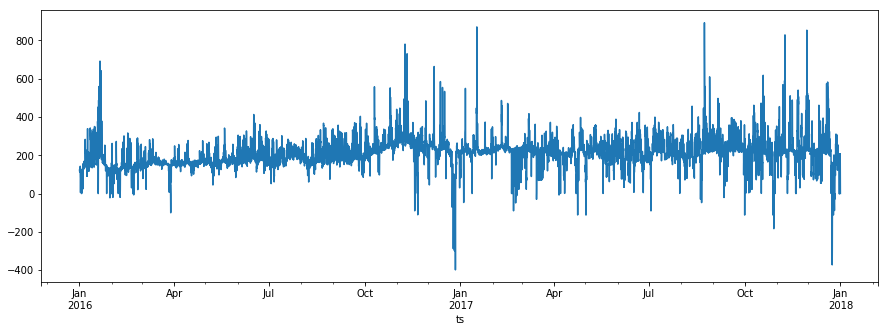

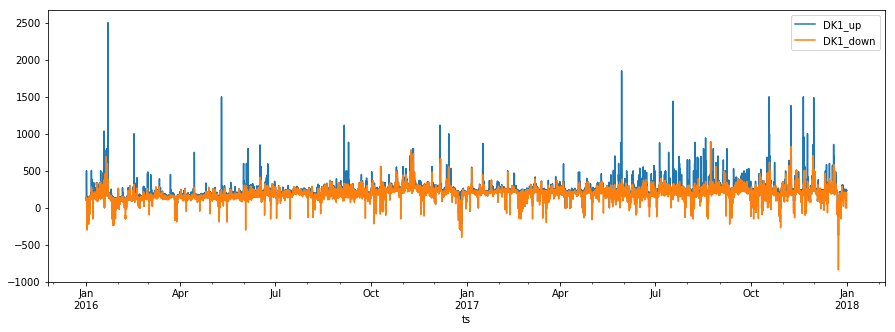

In [19]:
prices['DK1'].plot(figsize=(15,5))
prices.drop(columns=['DK1']).plot(figsize=(15,5))

## Parsing historical data from wind generation

In [20]:
wind_power_2016_raw_data = pd.read_html('data/wind-power-dk_2016_hourly.xls')[0].values
wind_power_2016 = pd.DataFrame(wind_power_2016_raw_data)
wind_power_2016 = wind_power_2016.drop([3],axis=1)
wind_power_2016.columns = ['Dates', 'Hours', 'DK1']
wind_power_2016['Hours'] = wind_power_2016['Hours'].str.slice(stop=2)
wind_power_2016['ts'] = pd.to_datetime(wind_power_2016['Dates'] + wind_power_2016['Hours'] + ':00', format='%d-%m-%Y%H:%M')
wind_power_2016 = wind_power_2016.drop(['Dates','Hours'],axis=1)
wind_power_2016 = wind_power_2016.set_index('ts')
wind_power_2016.head()

,DK1
ts,
2016-01-01 00:00:00,1314
2016-01-01 01:00:00,1267
2016-01-01 02:00:00,1159
2016-01-01 03:00:00,1160
2016-01-01 04:00:00,1069


## Reference - Perfect solution

In [54]:
reference = pd.DataFrame()
reference = prices[prices.index.year == 2017].drop(['DK1_up', 'DK1_down'],axis=1)
reference['Production'] = forecast_df['meas'].values/1000
reference['Revenue'] = reference['Production']*reference['DK1']
reference_revenue = reference['Revenue'].sum()
reference.head()

,DK1,Production,Revenue
ts,,,
2017-01-01 00:00:00,155.82,144.796,22562.1
2017-01-01 01:00:00,155.37,138.824,21569.1
2017-01-01 02:00:00,134.78,139.307,18775.8
2017-01-01 03:00:00,119.17,139.602,16636.4
2017-01-01 04:00:00,122.14,137.667,16814.6


In [55]:
print('The revenue for reference: {}'.format(reference_revenue))

The revenue for reference: 146577333.05250993


## Strategy 1 - Based on historical data

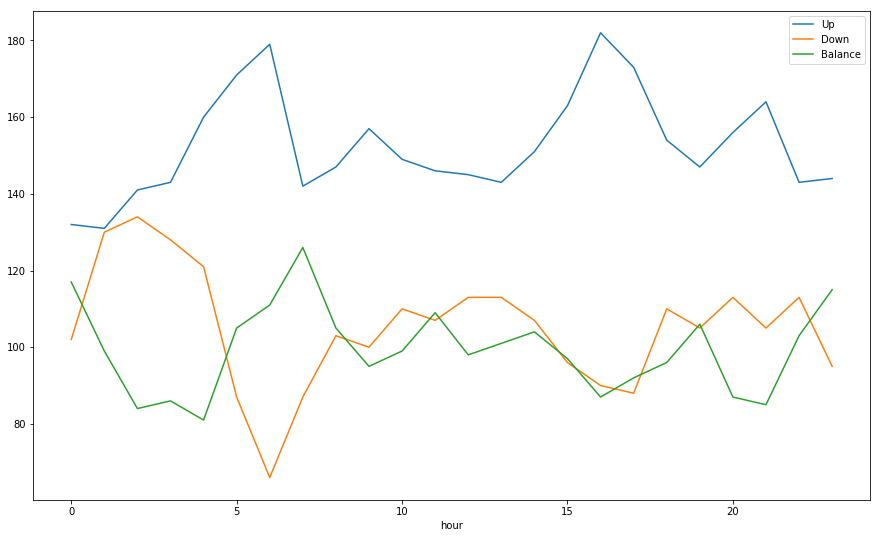

In [39]:
prices2016 = prices[prices.index.year == 2016]
prices2016 = prices2016.astype(float).round({'DK1': 0, 'DK1_up': 0, 'DK1_down': 0})
prices2016['Up'] = ((prices2016['DK1'] == prices2016['DK1_up']) & (prices2016['DK1_down'] != prices2016['DK1_up']))
prices2016['Down'] = ((prices2016['DK1'] == prices2016['DK1_down']) & (prices2016['DK1_down'] != prices2016['DK1_up']))
prices2016['Balance'] = (prices2016['DK1_up'] == prices2016['DK1_down'])
prices2016 = prices2016*1
prices2016['hour'] = prices2016.index.hour
hist_up_down = prices2016.groupby('hour').agg({"Up": "sum", "Down": "sum", "Balance": "sum"})
hist_up_down.plot(figsize=(15,9))

In [148]:
strategy1 = pd.DataFrame()
strategy1 = prices[prices.index.year == 2017]
strategy1['Bid'] = 160
strategy1['Production'] = forecast_df['meas'].values/1000
strategy1['Dayahead Revenue'] = strategy1['Bid']*strategy1['DK1']
strategy1['Delta'] = strategy1['Production'] - strategy1['Bid']
strategy1['Regulation Revenue'] = strategy1['Delta']*strategy1['DK1_up']
strategy1_revenue = strategy1['Regulation Revenue'].sum() + strategy1['Dayahead Revenue'].sum()
strategy1_ratio = strategy1_revenue/reference_revenue
strategy1.head()

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

,DK1,DK1_up,DK1_down,Bid,Production,Dayahead Revenue,Delta,Regulation Revenue
ts,,,,,,,,
2017-01-01 00:00:00,155.82,155.79,114.39,160,144.796,24931.2,-15.204,-2368.63
2017-01-01 01:00:00,155.37,186.17,155.34,160,138.824,24859.2,-21.176,-3942.34
2017-01-01 02:00:00,134.78,186.17,134.75,160,139.307,21564.8,-20.693,-3852.42
2017-01-01 03:00:00,119.17,119.15,119.15,160,139.602,19067.2,-20.398,-2430.42
2017-01-01 04:00:00,122.14,122.12,122.12,160,137.667,19542.4,-22.333,-2727.31


## Strategy 2 - Deterministic

In [172]:
strategy2 = pd.DataFrame()
strategy2 = prices[prices.index.year == 2017]
strategy2['Bid'] = forecast_df['fore'].values/1000
strategy2['Production'] = forecast_df['meas'].values/1000
strategy2['Dayahead Revenue'] = strategy2['Bid']*strategy2['DK1']
strategy2['Delta'] = strategy2['Production'] - strategy2['Bid']
strategy2_up = strategy2[strategy2['Delta'] <= 0]
strategy2_down = strategy2[strategy2['Delta'] > 0]
strategy2_up['Regulation Revenue'] = strategy2_up['DK1_up']*strategy2_up['Delta']
strategy2_down['Regulation Revenue'] = strategy2_down['DK1_down']*strategy2_down['Delta']

strategy2_revenue = strategy2_up['Regulation Revenue'].sum() + strategy2_up['Dayahead Revenue'].sum() + strategy2_down['Regulation Revenue'].sum() + strategy2_down['Dayahead Revenue'].sum()
strategy2_ratio = strategy2_revenue/reference_revenue
strategy2_ratio

C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

0.9709997163576813

## Strategy 3 - Probabilistic 

In [208]:
alpha2016 = prices2016.drop(columns=['Up', 'Down', 'Balance'])
alpha2016['pi+'] = (prices2016['DK1'] - prices2016['DK1_down'])
alpha2016['pi-'] = (prices2016['DK1_up'] - prices2016['DK1'])

Using mean optimal alpha of the year: 

In [209]:
pi_plus = alpha2016['pi+'].mean()
pi_minus = alpha2016['pi-'].mean()
alpha_2016 = pi_plus/(pi_plus+pi_minus)
alpha_2016

0.6059563920594119

Using mean optimal alpha for 24 hours: 

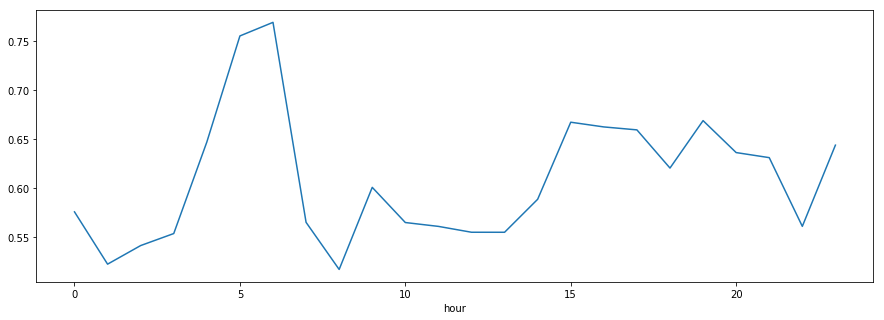

In [211]:
alpha_profile = alpha2016.groupby('hour').agg({"pi+": "mean", "pi-": "mean"})
alpha_profile['alpha'] = alpha_profile['pi+']/(alpha_profile['pi+']+alpha_profile['pi-'])
alpha_profile['alpha'].plot(figsize=(15,5))

Using mean optimal alpha for months:

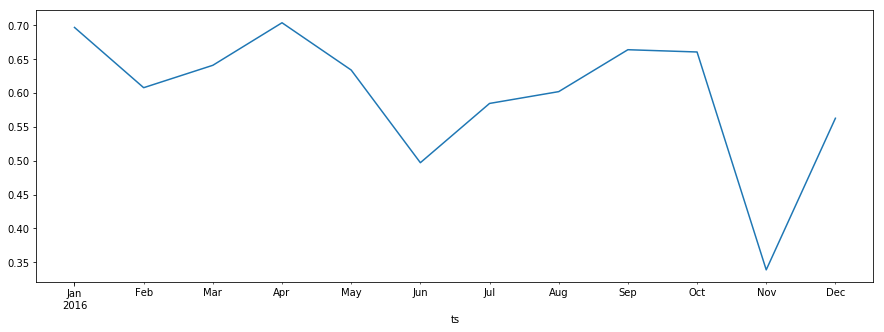

In [215]:
alpha_month = alpha2016.groupby(pd.Grouper(freq='M')).agg({"pi+": "mean", "pi-": "mean"})
alpha_month['alpha'] = alpha_month['pi+']/(alpha_month['pi+']+alpha_month['pi-'])
alpha_month['alpha'].plot(figsize=(15,5))